<a href="https://colab.research.google.com/github/ritiknayakzz/Telecom-Churn-Analysis-EDA-project/blob/main/EDA_Capstone_Project_(Telecom_Churn_Analysis)_Ritik_Prakash_Nayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **"Exploratory Data Analysis can never be the whole story, but nothing else can serve as the foundation stone -- as the first step"**

#  **- John W. Tukey**




*The dataset has information (it is hard to tell whether thorough or brief) about the various customers of a telecom company. The customers are further classified into 2 categories referring to whether they have renounced the services of the company or not. In this context, 'True' refers to the customers that have left the company whereas 'False' refers otherwise* 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = (15, 8)

from collections import Counter, defaultdict

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/Telecom Churn Analysis/Telecom Churn.csv')

How do the first few records look like

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Let's also find out the total no. of records and variables in the dataset

In [ ]:
print('Total no. of records in the dataset is {}'.format(df.shape[0]))
print('Total no. of variables in the dataset is {}'.format(df.shape[1]))

Total no. of records in the dataset is 3333
Total no. of variables in the dataset is 20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# **What are we investigating?**

Before analysing anything, we ought to know what do we want to discover. It is based on the question that we are trying to answer can we proceed any further. Exploratory data analysis (EDA) then becomes the preliminary analysis, a summary of the dataset but *not the whole story.*

# ***Are Customers with higher charges more prone to churn?***

In order to answer this question, we first have to identify which variables in the dataset pertain to the charges. There are four such variables in the dataset namely;

1. 'Total day charge'
2. 'Total eve charge' 
3. 'Total night charge'
4. 'Total intl charge'

In [ ]:
day = df['Total day charge']
eve = df['Total eve charge']
night = df['Total night charge']
intl = df['Total intl charge']

## Must a separate variable be defined for the international charges? 
## Sans an official documentation, I assume that the international
## charges have not been estimated separately for day, evening and night

true = df[df['Churn'] == True]
false = df[df['Churn'] == False]

Now for the kind of analysis that we're going to begin with, it is essential to understand whether there is equal no. of classes in the dataset for both 'True' and 'False'.

In [ ]:
print(df['Churn'].value_counts())
print('------------------------')
print((df['Churn'].value_counts() * 100) / sum(df['Churn'].value_counts()))

False    2850
True      483
Name: Churn, dtype: int64
------------------------
False    85.508551
True     14.491449
Name: Churn, dtype: float64


From the above cell, it is quite lucid that there is a imbalance in the representation of classes. Though this is not of concern to this author at this stage, but it is intriguing to comment that it is only fair to expect a class imbalance in a realm like this (telecom churn dataset). Afterall, only a few customers must be churning. Had that been more weighted towards the Positive class, I must have concluded that perhaps the MDs must take a serious note of the issue.

But constraining myself to the question at hand, I conclude that for the apparent imbalance in the classes, a *histogram will not be a viable tool for univariate analysis.* Why? We'll see an example

***Analyzing the 'day charges'***

In [ ]:
day.describe()

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: Total day charge, dtype: float64

The minimal difference between the sample mean and median for the data suggest that there's little or no skewness in the charges for day ('day' variable).

In [ ]:
## The top 10 smallest and largest values in the variable

print(day.nsmallest(10))
print('-------------------------------------------------')
day.nlargest(10)

1345    0.00
1397    0.00
2736    0.44
2753    1.33
1986    1.34
1052    2.13
2252    2.99
3046    3.21
1621    3.32
1076    4.40
Name: Total day charge, dtype: float64
-------------------------------------------------


365     59.64
985     58.96
2594    58.70
156     57.36
605     57.04
975     56.83
15      56.59
1679    56.07
2028    55.78
197     55.51
Name: Total day charge, dtype: float64

The statistics demonstrated above give a sense that the variable is normally distributed. Let's depict whether our hypothesis is true or not by means of a histogram.

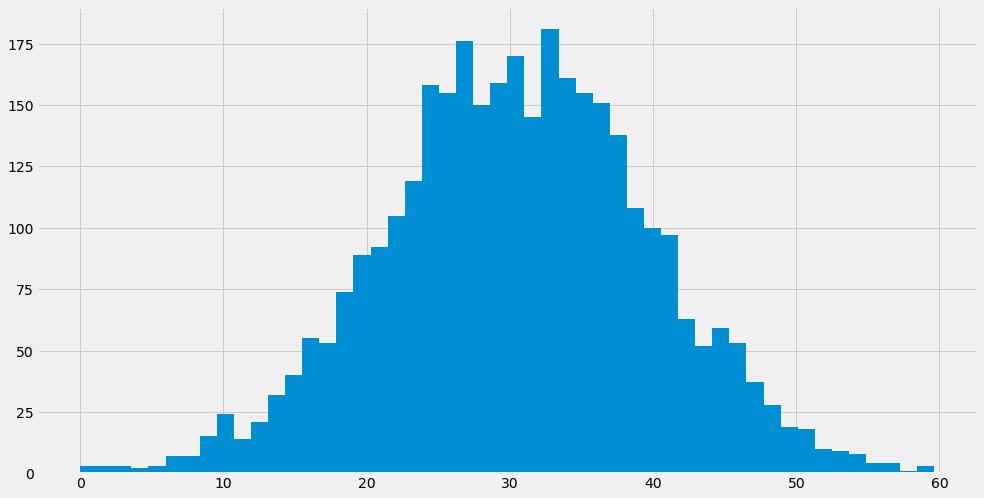

In [ ]:
day.hist(bins = 50)

## See a negligible skewness towards left

The histogram looks good and gives a clear picture of the data. Nonetheless, what happens when we hue it based on the classes ('True' and 'False')?

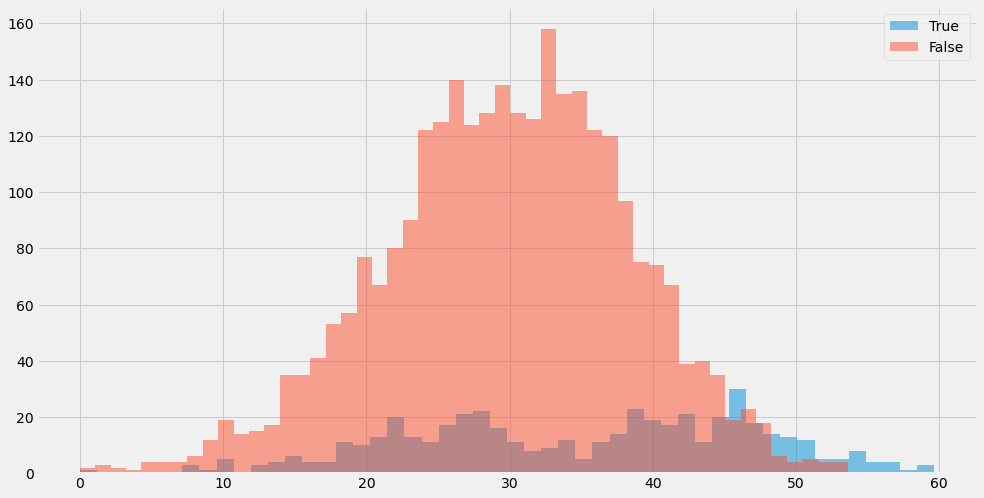

In [ ]:
true['Total day charge'].hist(bins = 50, alpha = 0.5, label = 'True')
false['Total day charge'].hist(bins = 50, alpha = 0.5, label = 'False')
plt.legend()

Now from this histogram, it is quite intriguing for a layman to comment that the frequency for the charges in the mid range is higher for customers not churning. But would that be a reliable argument? No. This is what is misleading about this kind of hued histogram.

*What is the alternative to it?*

The Probability Density Functions must give reliable outcome in this case. Let's see how, but before that let's just point out the mode, kustosis and skewness in this dataset, which is not very necessary for the kind of clarity that we have have from the previously demonstrated statistics.

In [ ]:
print(night.mode())
print('-------------------------------------------------')
print(night.skew())
print('-------------------------------------------------')
print(night.kurt())

## Results are as expected

0    9.45
1    9.66
dtype: float64
-------------------------------------------------
0.008886236769217034
-------------------------------------------------
0.08566317984047211


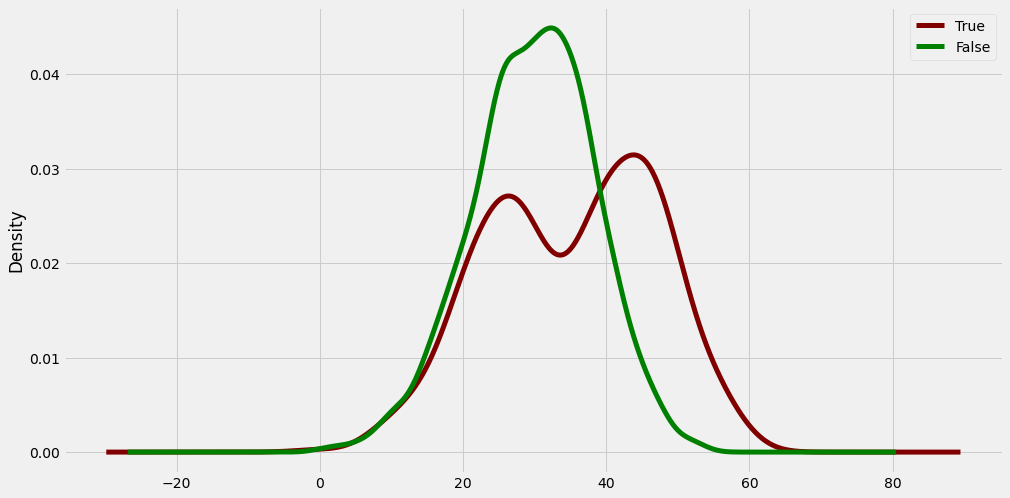

In [ ]:
plt.figure(figsize = (15, 8))

true['Total day charge'].plot.kde(alpha = 1.0, label = 'True', color = 'maroon', lw = 5)
false['Total day charge'].plot.kde(alpha = 1.0, label = 'False', color = 'green', lw = 5)

plt.legend()
plt.show()

The picture is now transparent. The author will note the conclusions later in the notebook but first let's summarize the other variables in the same way also.

***Analyzing the 'evening charges'***

In [ ]:
eve.describe()

count    3333.000000
mean       17.083540
std         4.310668
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: Total eve charge, dtype: float64

In [ ]:
print(eve.nsmallest(10))
print('-------------------------------------------------')
print(eve.nlargest(10))

2932    0.00
32      2.65
533     3.59
889     3.61
821     3.73
1233    4.09
1960    4.18
850     4.50
1190    4.76
1054    4.98
Name: Total eve charge, dtype: float64
-------------------------------------------------
2732    30.91
2331    30.75
2551    30.11
8       29.89
1601    29.83
302     29.79
6       29.62
580     29.52
3075    29.01
2160    28.89
Name: Total eve charge, dtype: float64


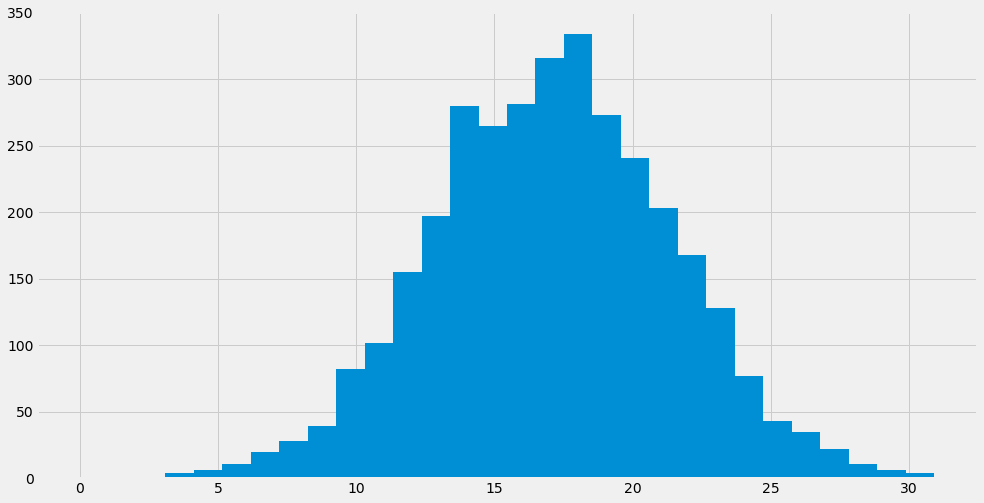

In [ ]:
## 30 bins will make sense

eve.hist(bins = 30)

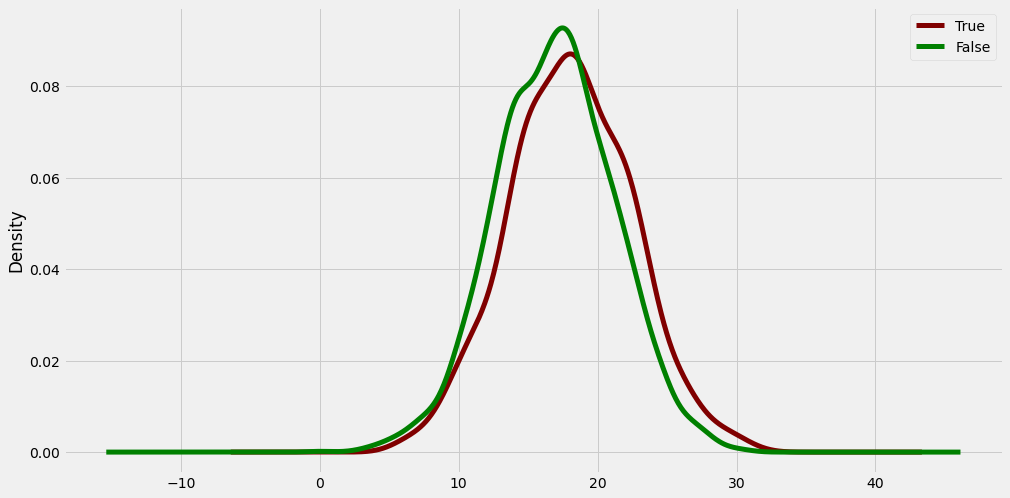

In [ ]:
plt.figure(figsize = (15, 8))

true['Total eve charge'].plot.kde(alpha = 1.0, label = 'True', color = 'maroon', lw = 5)
false['Total eve charge'].plot.kde(alpha = 1.0, label = 'False', color = 'green', lw = 5)

plt.legend()
plt.show()

***Analyzing the 'night charges'***

In [ ]:
night.describe()

count    3333.000000
mean        9.039325
std         2.275873
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: Total night charge, dtype: float64

In [ ]:
print(night.nsmallest(10))
print('-------------------------------------------------')
print(night.nlargest(10))

1260    1.04
1113    1.97
883     2.03
3247    2.13
1072    2.25
2756    2.25
3024    2.40
2382    2.43
999     2.45
2350    2.55
Name: Total night charge, dtype: float64
-------------------------------------------------
2663    17.77
1317    17.19
1445    16.99
2321    16.55
3107    16.42
922     16.39
244     15.97
1238    15.86
3060    15.85
2754    15.76
Name: Total night charge, dtype: float64


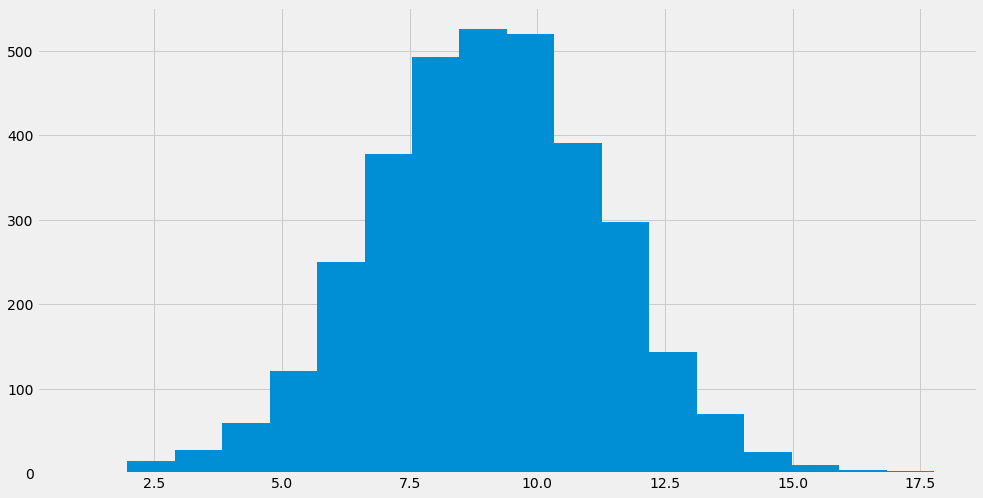

In [ ]:
night.hist(bins = 18)

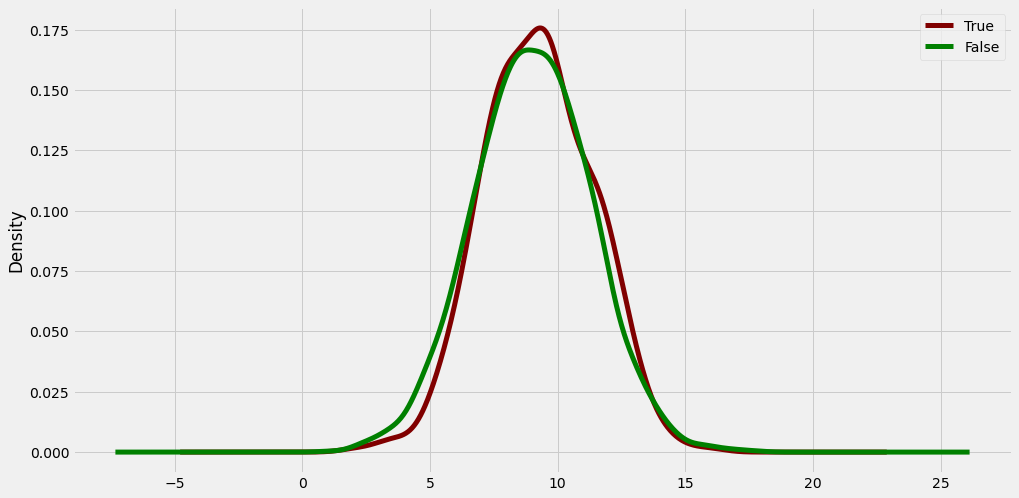

In [ ]:
plt.figure(figsize = (15, 8))

true['Total night charge'].plot.kde(alpha = 1.0, label = 'True', color = 'maroon', lw = 5)
false['Total night charge'].plot.kde(alpha = 1.0, label = 'False', color = 'green', lw = 5)

plt.legend()
plt.show()

***Analyzing the 'international charges'***

In [ ]:
intl.describe()

count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: Total intl charge, dtype: float64

In [ ]:
print(intl.nsmallest(10))
print('-------------------------------------------------')
print(intl.nlargest(10))

179     0.0
343     0.0
488     0.0
595     0.0
712     0.0
878     0.0
1028    0.0
1080    0.0
1400    0.0
1564    0.0
Name: Total intl charge, dtype: float64
-------------------------------------------------
115     5.40
314     5.10
1816    4.97
2816    4.94
535     4.91
2371    4.91
367     4.86
1257    4.86
2534    4.86
1420    4.83
Name: Total intl charge, dtype: float64


In [ ]:
## Looks like we have got a few zero charges cases to deal with
## So let's remove the zeroes and then depict the top 10 smallest charges

intl[intl > 0].nsmallest(10)

2669    0.30
762     0.35
397     0.54
1966    0.54
2933    0.57
3160    0.57
1099    0.59
3216    0.65
3234    0.68
2256    0.70
Name: Total intl charge, dtype: float64

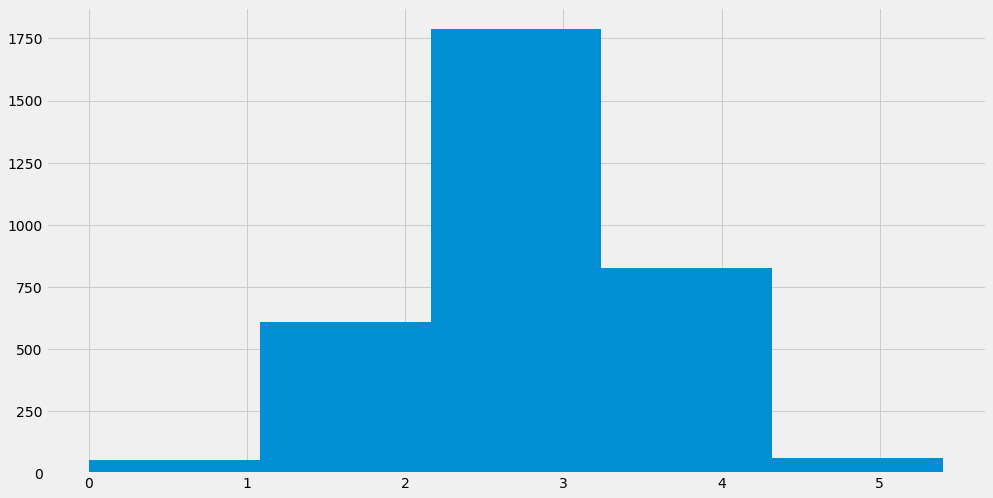

In [ ]:
intl.hist(bins = 5)

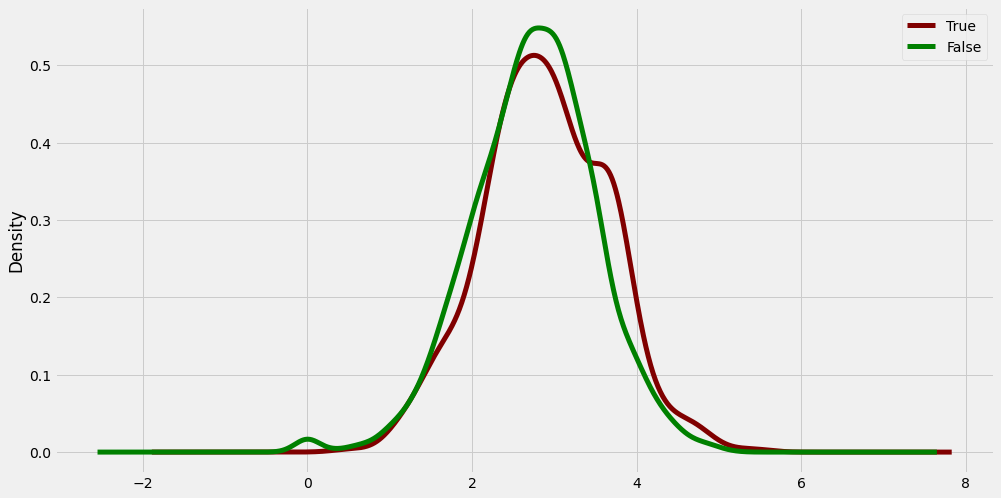

In [ ]:
plt.figure(figsize = (15, 8))

true['Total intl charge'].plot.kde(alpha = 1.0, label = 'True', color = 'maroon', lw = 5)
false['Total intl charge'].plot.kde(alpha = 1.0, label = 'False', color = 'green', lw = 5)

plt.legend()
plt.show()

*What do the PDFs of all the listed variables portray?*

That it is evident from the sample that upon analyzing each variable separately, the customers being charged more tend to leave with a higher probability. But this phenomena is more firm in the day and international charges variable as compare to their evening and night counterparts. This might mean that focusing on containing the company has a policy for charging less in the hours following tea. Or that people choose to ring fewer calls or send fewer messages for that matter of fact after 6 pm. It must also be noted that there's a small peak on 0 for the PDF of the international charges. And that peak is only for the 'False' class. It might be possible that it refers to the customers that haven't availed the international plan.

***Summing up all the prices***

It was important to summarize and analyze the variables individually. However, we could perhaps make a more concrete observation by summing them all up into one single variable. 

In [ ]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']
true['Total charge'] = true['Total day charge'] + true['Total eve charge'] + true['Total night charge'] + true['Total intl charge']
false['Total charge'] = false['Total day charge'] + false['Total eve charge'] + false['Total night charge'] + false['Total intl charge']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


We should now analyze the newly formed variable in the backdrop of the same question that we asked in the beginning

In [ ]:
print(true['Total charge'].describe())
print('-------------------------------------------------')
print(false['Total charge'].describe())
print('-------------------------------------------------')
print(df['Total charge'].describe())

count    483.000000
mean      65.355963
std       13.885268
min       22.930000
25%       53.425000
50%       66.910000
75%       76.655000
max       96.150000
Name: Total charge, dtype: float64
-------------------------------------------------
count    2850.000000
mean       58.448807
std         9.458436
min        23.250000
25%        52.220000
50%        58.920000
75%        65.137500
max        87.290000
Name: Total charge, dtype: float64
-------------------------------------------------
count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: Total charge, dtype: float64


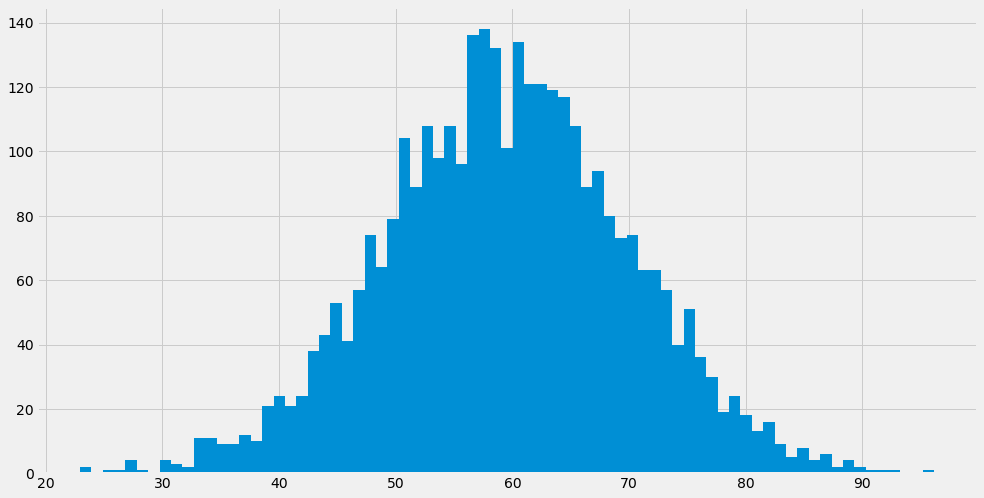

In [ ]:
df['Total charge'].hist(bins = 75)

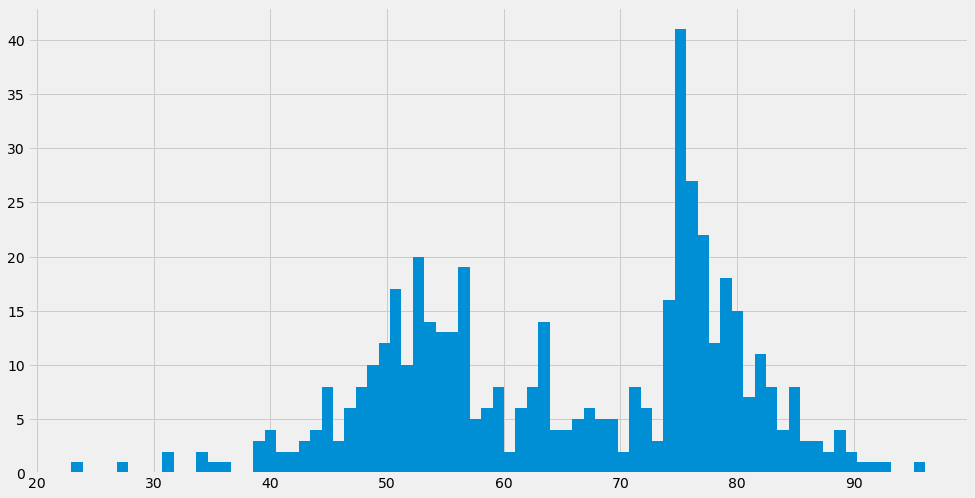

In [ ]:
true['Total charge'].hist(bins = 75)

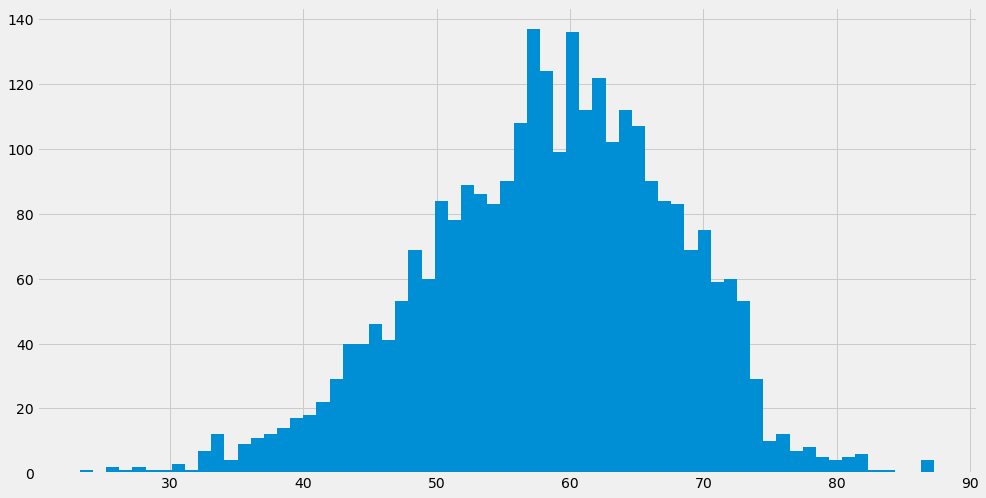

In [ ]:
false['Total charge'].hist(bins = 65)

While the overall distribution of the newly created variable is by and large gaussian, the individual distributions for the 'True' and the 'False' classes turns out to be slightly more deviated and left skewed respectively. 

We should now plot their hued PDF and see whether we could get even closer to answering our question

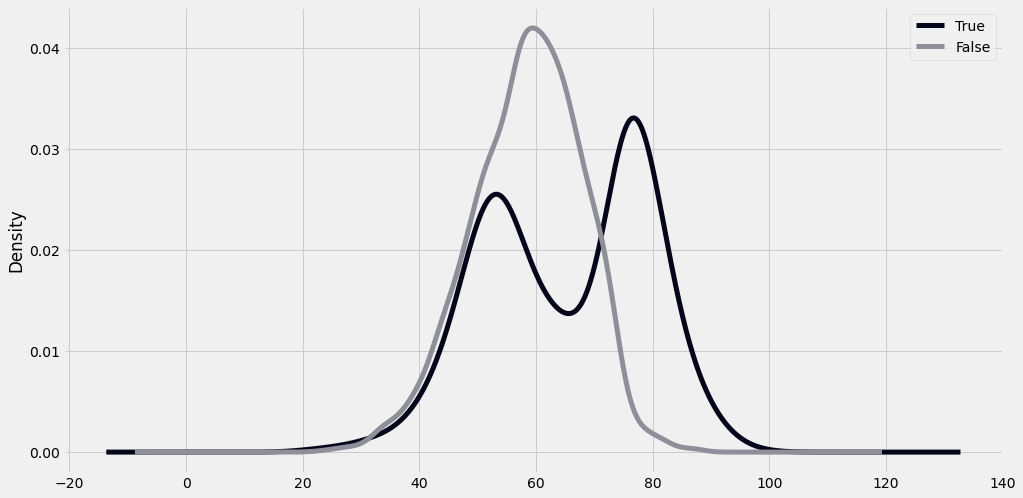

In [ ]:
true['Total charge'].plot.kde(alpha = 1.0, label = 'True', color = '#04061a', lw = 5)
false['Total charge'].plot.kde(alpha = 1.0, label = 'False', color = '#8e8f99', lw = 5)

plt.legend()

Breifly speaking, it appears that the customers that are paying more than 70 units tend to churn more probably. On a deeper note, it is apparent that the trend observes a downward turn from 50 units of charge but the trend of the churners soars againat somewhere around 65 units of charge. Let's take a closer look at that

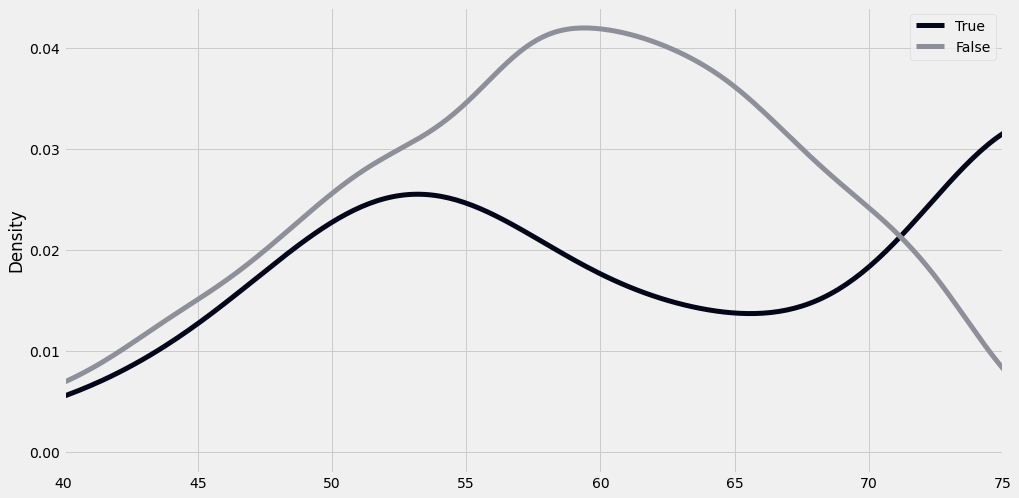

In [ ]:
true['Total charge'].plot.kde(alpha = 1.0, label = 'True', color = '#04061a', lw = 5)
false['Total charge'].plot.kde(alpha = 1.0, label = 'False', color = '#8e8f99', lw = 5)
plt.xlim([40, 75])

plt.legend()

Let's plot a CDF in order to depict a still clearer picture of the results that have the PDF has transpired

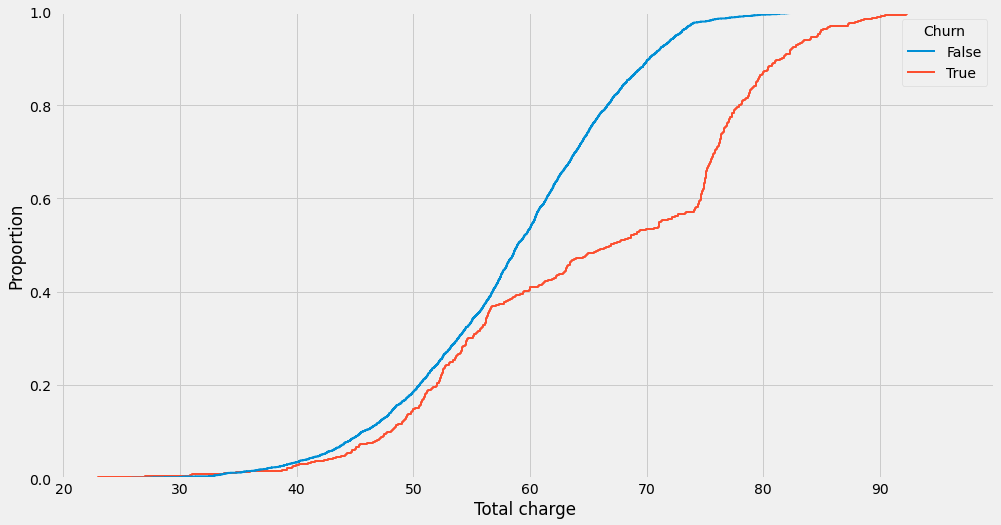

In [ ]:
sns.ecdfplot(x = 'Total charge', hue = 'Churn', data = df, lw = 2)

From the empirical CDF of the data, we could observe that there's a slight discrepancy in both the cdfs when the charges are less than 40 units which grows wider as we go east and upon surpassing 65 units of charge soars unprecedently. 

From both the PDFs and CDFs, one could argue that the company of course is at a risk of losing the customers that are being charged more. Though, as the PDF so suggest, the rift is wider if one goes across 70 units, the minute discrepancies portrayed earlier by the CDF could not be ignored. It is for the charges in the telecom realm vary by very small units. So comparing apples with apples, by the standards of the telecom companies, small differences should also be a matter of concern.

(40.0, 56.0)

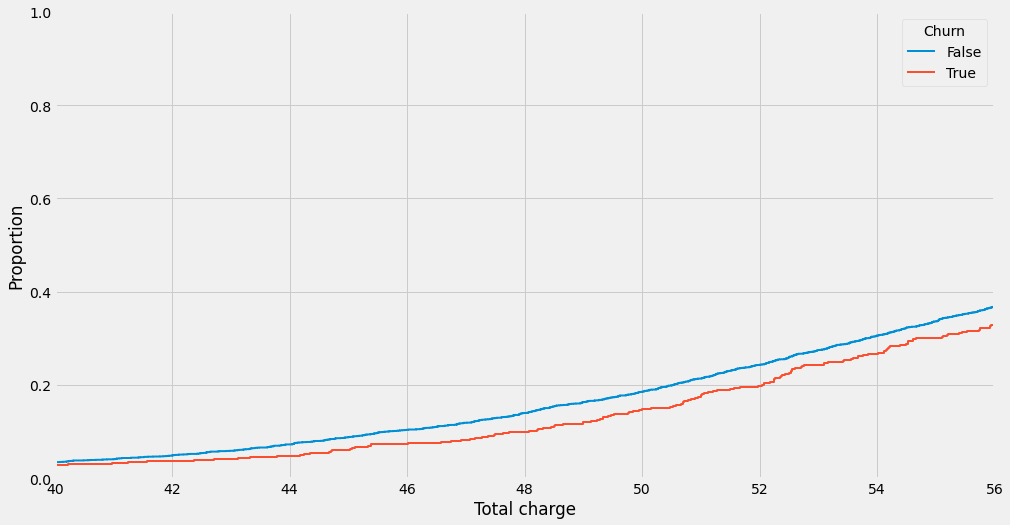

In [ ]:
## A zoomed view depicting that the differences to the extent of 
## more than a couple of units should a matter of concern

sns.ecdfplot(x = 'Total charge', hue = 'Churn', data = df, lw = 2)

plt.xlim([40, 56])

***Binning***

At this point, I feel compelled to analyze this trend in more depth. Binning the data and finding the difference in the percentage of the occurence of each bin in both the classes will be useful

In [ ]:
## Binning the data into 5 most significant bins
## as is portrayed by the graphs above

df['bins'] = df['Total charge'].apply(lambda x: 1 if x <= 40
                                      else 2 if x <= 50
                                      else 3 if x <= 60
                                      else 4 if x <= 70
                                      else 5)

true['bins'] = df[df['Churn'] == True]['bins']
false['bins'] = df[df['Churn'] == False]['bins']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
## Plotting the differences in form of percentages
## having determined their respective pmfs

hist_true = dict(true['bins'].value_counts())
hist_false = dict(false['bins'].value_counts())

pmf_true, pmf_false = defaultdict(), defaultdict()
n1 = true.shape[0]
n2 = false.shape[0]

for idx, freq in hist_true.items():
  pmf_true[idx] = freq / n1

for idx, freq in hist_false.items():
  pmf_false[idx] = freq / n2

ts = [i for i in range(1, 6)]
diffs = []
for t in ts:
  p1 = pmf_true[t]
  p2 = pmf_false[t]
  diff = p1 - p2
  diffs.append(diff * 100)

diffs

[-0.5751334858886344,
 -3.079437724746649,
 -9.172714394682357,
 -23.195161817587444,
 36.02244742290509]

<BarContainer object of 5 artists>

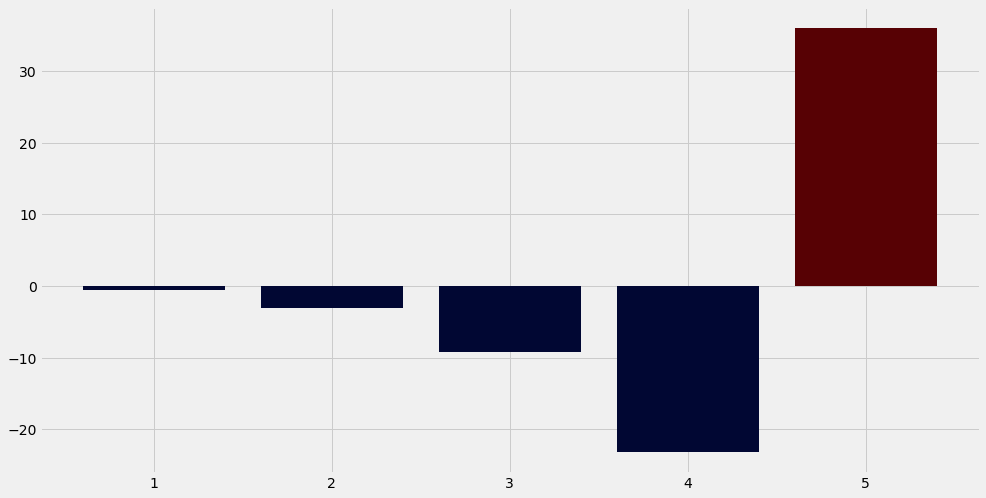

In [ ]:
plt.bar(ts, diffs, color = pd.Series(diffs).apply(lambda x: '#570104' if x>0
                                                  else '#010733'))

The bar graph above demonstrates the result more robustly. As one goes eastward, one could the valley grows shallower. However, suddenly for charges more than 70 units, a steep hill is encountered in the favor of the 'True' class. That is, *a customer being charged more than 70 units is 36% more likely to churn*

***Relative Risk***

Before concluding the observations obtained for the given sample, let's estimate another indicator for determining whether the customers that are being charged more than 70 units churn more or not.

We'll use *relative risk,* which is the risk of the customers churning in one group (<70) vs the other (>70).

But for the, we first have to define a function for the empirical cdf

In [ ]:
## A function for CDF

def cdf(sample, value):
  count = 0
  for i in sample:
    if i <= value:
      count += 1
  return (count * 100) / len(sample) 

In [ ]:
## First, relative risk of Customers 
## being charged less than 70 units 

x = cdf(true['Total charge'], 70)
y = cdf(false['Total charge'], 70)
relative_risk = y / x
print(relative_risk)

1.6743737250102


In [ ]:
## Second, relative risk of Customers 
## being charged more than 70 units

x = 100 - cdf(true['Total charge'], 70)
y = 100 - cdf(false['Total charge'], 70)
relative_risk = y / x
print(relative_risk)

0.2267181286549708


Now, a final demonstration of our evaluation

Customers being charged less than 70 units are about 68% MORE LIKELY TO STAY
Customers being charged more than 70 units are about 80% LESS LIKELY TO STAY 



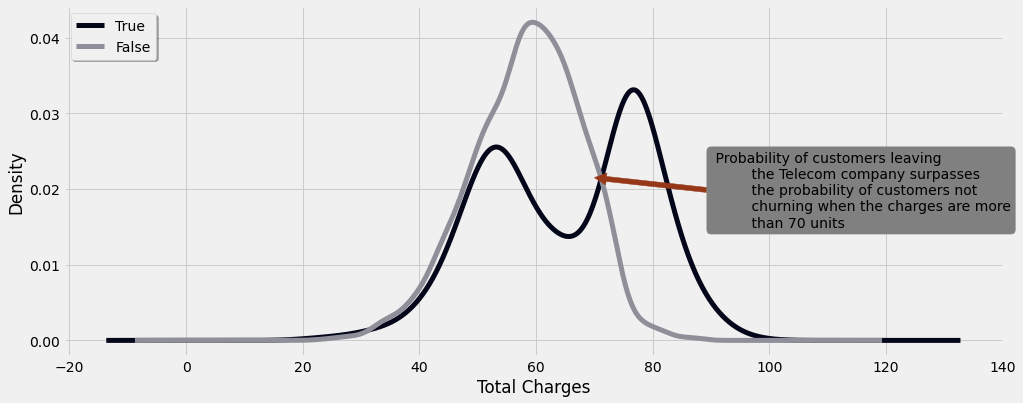

In [ ]:
print("Customers being charged less than 70 units are about {} MORE LIKELY TO STAY".format('68%'))
print("Customers being charged more than 70 units are about {} LESS LIKELY TO STAY".format('80%'), '\n')

plt.figure(figsize = (15, 6))

true['Total charge'].plot.kde(alpha = 1.0, label = 'True', color = '#04061a', lw = 5)
false['Total charge'].plot.kde(alpha = 1.0, label = 'False', color = '#8e8f99', lw = 5)

string = """ Probability of customers leaving
         the Telecom company surpasses
         the probability of customers not 
         churning when the charges are more
         than 70 units """

plt.annotate(string, xy = (70, 0.0215),
                     xytext = (90, 0.015),
             arrowprops = dict(
                               color = '#963717',
                               width = 5),
             bbox = dict(boxstyle = 'round',
                         color = 'gray',
                         alpha = 1.0))
plt.xlabel('Total Charges')
plt.legend(shadow = True, loc = 'upper left')
plt.show()

***Effect Size***

Having concluded the results for the sample, 2 important statistics have to be pointed out. This has to be done in order to establish the claim that have been made for the sample. The 2 statistics that must be called attention to are;

1. The size of the effect,
2. Whether the observation is true for the population at large or not.

Addressing the first, we'll employ *Cohen's d*

In [ ]:
data1 = df[df['Churn'] == True]['Total charge']
data2 = df[df['Churn'] == False]['Total charge']

In [ ]:
def cohen_d(group1, group2):
  diff = group1.mean() - group2.mean()
  var1 = group1.var()
  var2 = group2.var()
  n1, n2 = len(group1), len(group2)
  pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
  d = diff / np.sqrt(pooled_var)
  return d

cohen_d(data1, data2)

0.6758829380675058

By Cohen's definition, the effect size of the effect that there's a significant difference between the means of both the groups is *'medium'.*

***Hypothesis Testing***

For the second statistic, I have defined my own class for a Permutation test. The idea is of course to test whether the effect that we are examining; there's a significant difference between the population mean of both the groups or not, is true for the entire population or not or has appeared in our sample data by sheer chance.

For the test, my null hypothesis is "*The customers that are being charged more **do not** churn more*".

In mathematical terms, it is; "*xbar for True - xbar for False **<=** 0*" where xbar is the sample mean.

In [ ]:
class HypothesisTest():

  def __init__(self, data):
    self.data = data
    self.actual = self.PermutationTest(data)

  def TestStat(self, data):
    data1, data2 = data

    n1 = len(data1)
    n2 = len(data2)

    var1 = data1.var()
    var2 = data2.var()

    diff = data1.mean() - data2.mean()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)

    d = diff / np.sqrt(pooled_var)
    return d

  def RunModel(self):
    data1, data2 = self.data

    sample1 = data1.sample(n=7, replace = True)
    sample2 = data2.sample(n=7, replace = True)

    return (sample1, sample2)

  def PermutationTest(self, data):
    data1, data2 = data
    test_stat = data1.mean() - data2.mean()
    return test_stat

  def PValue(self, iterations = 3000):
    self.test_stats = [self.PermutationTest(self.RunModel())
                       for _ in range(iterations)]

    count = sum(1 for x in self.test_stats if x <= 0.0)
    return count / iterations

In [ ]:
data1 = df[df['Churn'] == True]['Total charge']
data2 = df[df['Churn'] == False]['Total charge']

ht = HypothesisTest((data1, data2))
pvalue = ht.PValue()
print(pvalue)

0.13666666666666666


A pvalue of 13% suggests that the null hypothesis could not be rejected for a significance level of 5% suggesting that the effect may have been by chance. Perhaps we need more data to establish the claim.

***The Influence of the Other Variables***

The effect that we saw in the sample data may have been because of the influence of the other variables present in data. 

Let's say for instance, that despite bearable charges for day, evening, and night, the charges of certain customers surpasses those of others because of a peculiarly high international charges. In that case, the company must call attention to the latter variable rather than the former three. It is a given that the *'Total charges'* variable depends on all four of the aforementioned variables. So, an unprecedented change in one of those may result in an equally or slighlty less significant change in the overall charges.

***Digging deep into the International charges***

Beginning with the total international charges

Firstly, I reflect upon the *'International plan'* variable and see whether it affects the classes

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


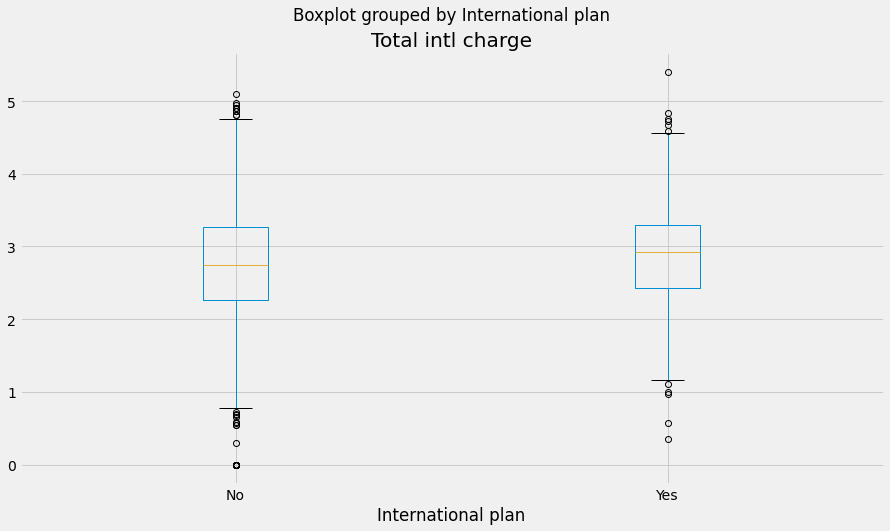

In [ ]:
df.boxplot(column = 'Total intl charge', by = 'International plan')
plt.show()

From the boxplots, I can tell that there's no remarkable difference. For a further analysis, it makes sense to estimate the per minute charge for international calls and for the other 3 variables as a matter of fact. It will be wiser to note whether there's a noteworthy difference between both the classes based upon this metric.

In [ ]:
x = pd.DataFrame(df.groupby(['International plan', 'Total intl calls'])['Total intl charge', 'Total intl minutes',
                                                                        'Total day charge', 'Total day minutes',
                                                                        'Total eve charge', 'Total eve minutes',
                                                                        'Total night charge', 'Total night minutes'].median())
x['intl charge/min'] = x['Total intl charge'] / x['Total intl minutes']
x['day charge/min'] = x['Total day charge'] / x['Total day minutes']
x['eve charge/min'] = x['Total eve charge'] / x['Total eve minutes']
x['night charge/min'] = x['Total night charge'] / x['Total night minutes']

x.iloc[:, -4:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


intl charge/min  ...  night charge/min
International plan Total intl calls                   ...                  
No                 0                             NaN  ...          0.044998
                   1                        0.269608  ...          0.045024
                   2                        0.269903  ...          0.045001
                   3                        0.270297  ...          0.045002
                   4                        0.269608  ...          0.045018
                   5                        0.269608  ...          0.045005
                   6                        0.270192  ...          0.044990
                   7                        0.269953  ...          0.045007
                   8                        0.270142  ...          0.044996
                   9                        0.270476  ...          0.044978
                   10                       0.269697  ...          0.044983
                   11                       0.269608  ...          0.045006
                   12                       0.269945  ...          0.045026
                   13                       0.269849  ...          0.045015
                   14                       0.270175  ...          0.045009
                   15                       0.269565  ...          0.044983
                   16                       0.270130  ...          0.044990
                   17                       0.269853  ...          0.045018
                   18                       0.269767  ...          0.044986
                   19                       0.270526  ...          0.044994
Yes                1                        0.269697  ...          0.045005
                   2                        0.270370  ...          0.045023
                   3                        0.270270  ...          0.045005
                   4                        0.270297  ...          0.045009
                   5                        0.269643  ...          0.045016
                   6                        0.269907  ...          0.045000
                   7                        0.270046  ...          0.044988
                   8                        0.269856  ...          0.045017
                   9                        0.270048  ...          0.045000
                   10                       0.269565  ...          0.044971
                   11                       0.269957  ...          0.044990
                   12                       0.270000  ...          0.044958
                   13                       0.269948  ...          0.044984
                   15                       0.270000  ...          0.045013
                   20                       0.269784  ...          0.045000

[35 rows x 4 columns]

The above dataframe confirms what we just (roughly) concluded from the box plot, that there's no significant difference in the charges for the customers availing for International plans against those that opt not.

Nevertheless, it looks like the per minute charges for the international calls cost more than that of its other counterparts. Also note the decimalized nature of the charges. As I said above, one may not assume even a single digit charge per minute let alone double digits. Therefore, by its very nature, a difference of even decimals might seem more for some of the customers.

It is tempting to also ask why are the customes that haven't opted for an international plan are calling so co much internationally? It might have happened that they mistakenly called somebody in a foreign country. If that is the case, one or two calls must have made sense but how could one mistakenly dial an international number more than 5 or 6 times? Anyways let's find out

In [ ]:
df[df['International plan'] == 'No']['Total intl calls'].value_counts().sort_index()

0      18
1     147
2     442
3     595
4     559
5     439
6     302
7     194
8     106
9      95
10     43
11     26
12     14
13     12
14      6
15      5
16      2
17      1
18      3
19      1
Name: Total intl calls, dtype: int64

In [ ]:
df[df['International plan'] == 'Yes']['Total intl calls'].value_counts().sort_index()

1     13
2     47
3     73
4     60
5     33
6     34
7     24
8     10
9     14
10     7
11     2
12     1
13     2
15     2
20     1
Name: Total intl calls, dtype: int64

It doen't look like that the calls are by mistake for if that was th ecase, there must have been an inconsistency in the distribution of both the classes. Or perhaps it might be argued that the data in the latter frequency chart is much less than that of the former. It seems that the observations greater than 10 or 13 in the 'No' international plans category are anomalies. Unless of course the company has other plans that I do not know about. 

At any case, it is lucid that the customers availing for that plan get no good benefits in terms of the charge per minute as opposed to their counterparts that choose otherwise.

But let's find out whether there is a incongruity in the churning percentages in the group of customers that choose to avail the international plans and those that do not

In [ ]:
x = df[df['International plan'] == 'No']
y = df[df['International plan'] == 'Yes']

n_x = len(x)
n_y = len(y)

perc_x = x['Churn'].value_counts() * 100 / n_x
perc_y = y['Churn'].value_counts() * 100 / n_y

print(perc_x)
print('-------------------------------')
print(perc_y)
print('-------------------------------')
print('-------------------------------')
print(x['Churn'].value_counts())
print('-------------------------------')
print(y['Churn'].value_counts())

False    88.504983
True     11.495017
Name: Churn, dtype: float64
-------------------------------
False    57.585139
True     42.414861
Name: Churn, dtype: float64
-------------------------------
-------------------------------
False    2664
True      346
Name: Churn, dtype: int64
-------------------------------
False    186
True     137
Name: Churn, dtype: int64


Looks like the customers not availing the international plans are more likely to leave. This might be because of the reason that they are charged in the same scale as those that do not have such a plan. But in this case, the data does not convey a worthwhile picture of the truth. It is for the fact that there is an imbalance between both the classes ('True' and 'False'). So, let's do a similar analysis. Let's rather find out the total yes and no (international plan) cases in both the 'True' and 'False' classes.

In [ ]:
n_x = len(true)
n_y = len(false)

perc_x = true['International plan'].value_counts() * 100 / n_x
perc_y = false['International plan'].value_counts() * 100 / n_y

print(perc_x)
print('-------------------------------')
print(perc_y)
print('-------------------------------')
print('-------------------------------')
print(true['International plan'].value_counts())
print('-------------------------------')
print(false['International plan'].value_counts())

No     71.635611
Yes    28.364389
Name: International plan, dtype: float64
-------------------------------
No     93.473684
Yes     6.526316
Name: International plan, dtype: float64
-------------------------------
-------------------------------
No     346
Yes    137
Name: International plan, dtype: int64
-------------------------------
No     2664
Yes     186
Name: International plan, dtype: int64


So, 71% of the customers that churn do not have an international plan whereas 93% of the customers that do not churn do not have an international plan. So, the probability of the customers not having an international plan, leaving is remarkably less.

Yet, this is not a kind to estimate to rely upon

In [ ]:
## Summary statistics of total intl charges
## for both the classes

print(x['Total intl charge'].mean())
print('-------------------------------')
print(y['Total intl charge'].mean())
print('-------------------------------')
print(x['Total intl charge'].std())
print('-------------------------------')
print(y['Total intl charge'].std())
print('-------------------------------')
print(x['Total intl calls'].mean())
print('-------------------------------')
print(y['Total intl calls'].mean())

2.7532790697674336
-------------------------------
2.8699071207430373
-------------------------------
0.7557159466917532
-------------------------------
0.7281506763683748
-------------------------------
4.465448504983389
-------------------------------
4.609907120743034


In [ ]:
## A few more summary statistics

print((df['Total day charge'] / df['Total day minutes']).mean())
print('-------------------------------------------------------')
print((df['Total eve charge'] / df['Total eve minutes']).mean())
print('-------------------------------------------------------')
print((df['Total night charge'] / df['Total night minutes']).mean())
print('-------------------------------------------------------')
print((df['Total intl charge'] / df['Total intl minutes']).mean())
print('-------------------------------------------------------')

0.1700032343416007
-------------------------------------------------------
0.08500117298813906
-------------------------------------------------------
0.045000345702212
-------------------------------------------------------
0.27005654558216496
-------------------------------------------------------


What difference will it make if we remove the international charges from the overall charges?

In [ ]:
df['Total'] = df['Total charge'] - df['Total intl charge']
df['Total minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes']
df['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls']

print((df['Total charge'] / (df['Total minutes'] + df['Total intl minutes'])).mean())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print((df['Total'] / (df['Total minutes'] + df['Total intl minutes'])).mean())
print('-------------------------------------------------------')
print(((df['Total charge'] -  df['Total day charge']) / (df['Total minutes'] + df['Total intl minutes'])).mean())
print('-------------------------------------------------------')
print(((df['Total charge'] -  df['Total eve charge']) / (df['Total minutes'] + df['Total intl minutes'])).mean())
print('-------------------------------------------------------')
print(((df['Total charge'] -  df['Total night charge']) / (df['Total minutes'] + df['Total intl minutes'])).mean())

0.10035415072876532
-------------------------------------------------------
-------------------------------------------------------
0.09556867687109692
-------------------------------------------------------
0.04899928060029129
-------------------------------------------------------
0.07144443775440543
-------------------------------------------------------
0.08505005696050394


Apparently removing the day charges makes a larger difference than the intl charges make. This should be because of the fact that the customers do not make as many intl calls as they do in the day.

***Let's talk about Voice mail***

The total charges must not be solely because of the calls that are being made. The company must be charging for the voice mails also. So let's now analyze the *'Voice mail plan'* variable.

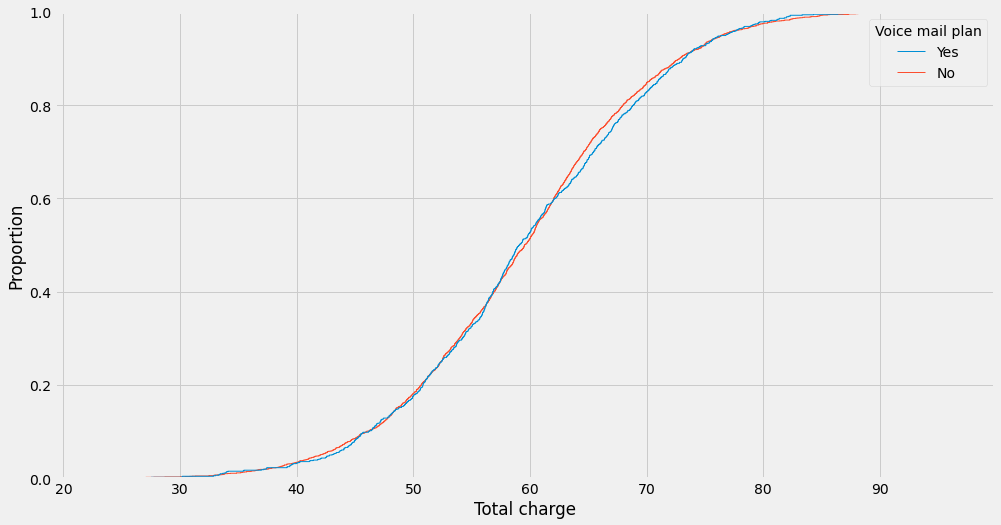

In [ ]:
sns.ecdfplot(x = 'Total charge', hue = 'Voice mail plan', data = df, lw = 1)

The empirical CDF for the variable suggests that the CDF for the customers that have employed the voice mail facility, surpasses the CDF for the customers that have not by a thin margin when the charges are higher.

Let's take a closer look at that region

(0.6, 1.0)

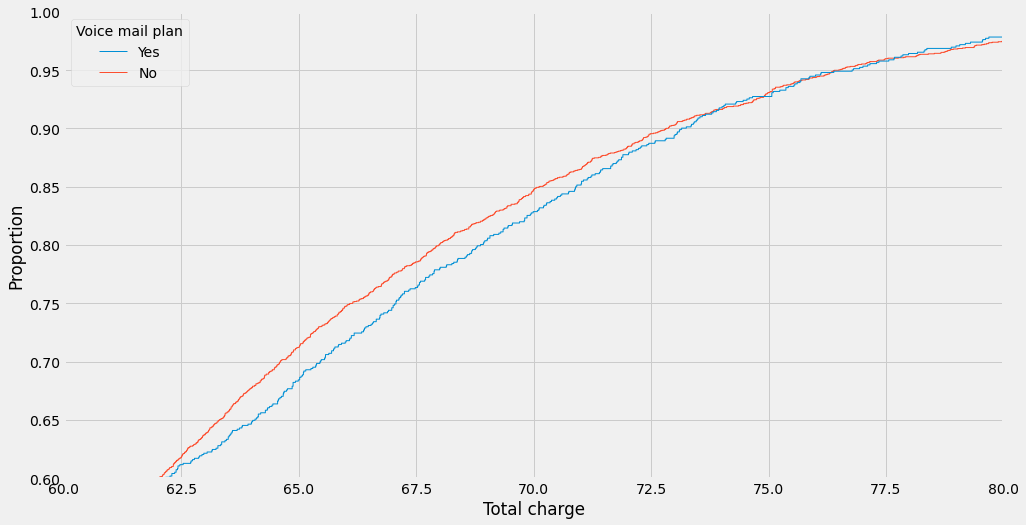

In [ ]:
sns.ecdfplot(x = 'Total charge', hue = 'Voice mail plan', data = df, lw = 1)
plt.xlim([60, 80])
plt.ylim([0.6, 1.0])

I suspect that the company perhaps has unusually less charges on the voice mails. Therefore, the charges for it weigh more when the overall charges are more.

Their KDEs might give a more empirical depiction

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


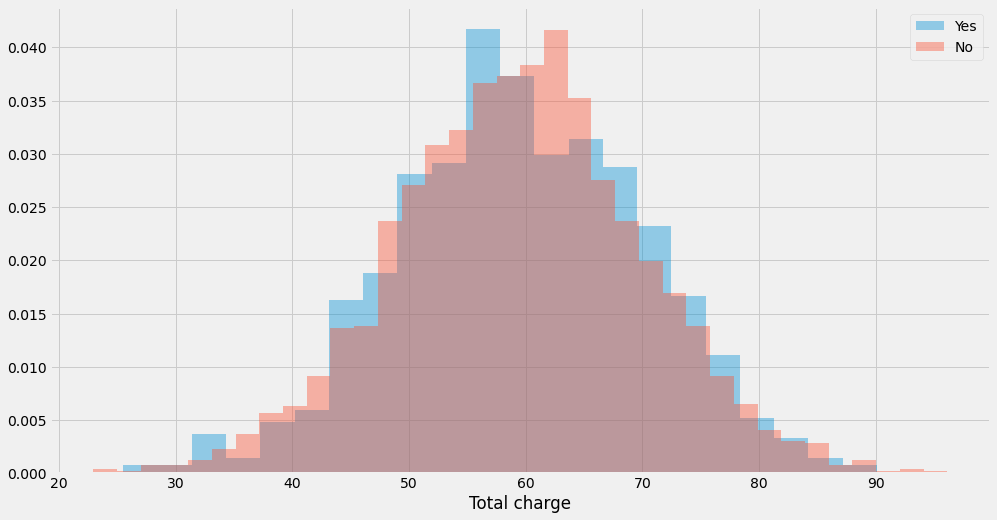

In [ ]:
sns.distplot(df[df['Voice mail plan'] == 'Yes']['Total charge'], kde = False, norm_hist = True, label = 'Yes')
sns.distplot(df[df['Voice mail plan'] == 'No']['Total charge'], kde = False, norm_hist = True, label = 'No')
plt.legend()

As opposed to my assumption, the trend for the higher charges is not as much biased towards the 'Yes' class as for me to conclude in the favor of my hypothesis. But I could not reject that entirely also for be little, there's still an inconsistency towards the higher values of charges that seem to fall in favor of 'Yes'. Of course, it might be because of the other variables that are at play.

It makes sense now to find out whether the customers using the vmail services more are the ones with the higher charges or not

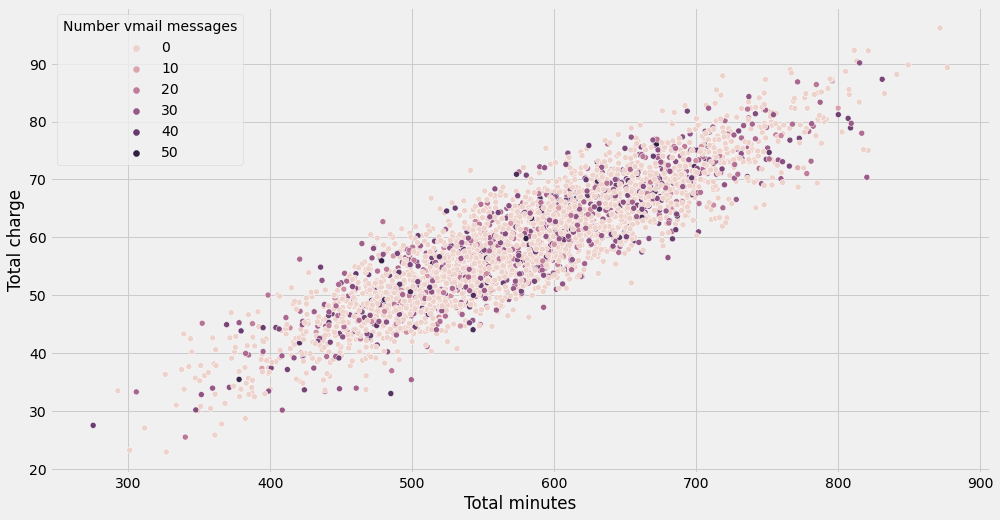

In [ ]:
sns.scatterplot(x = 'Total minutes', y = 'Total charge', hue = 'Number vmail messages', data = df)

Surprisingly, the even distribution of points suggest that the total charges are not at all influenced by the no. of vmails. This firms my belief in my earlier hypothesis - the company levies paltry (not even modest) charges on the vmails apparently.

Let's analyze a few more things about the voice mails

1. Correlation with the total charges

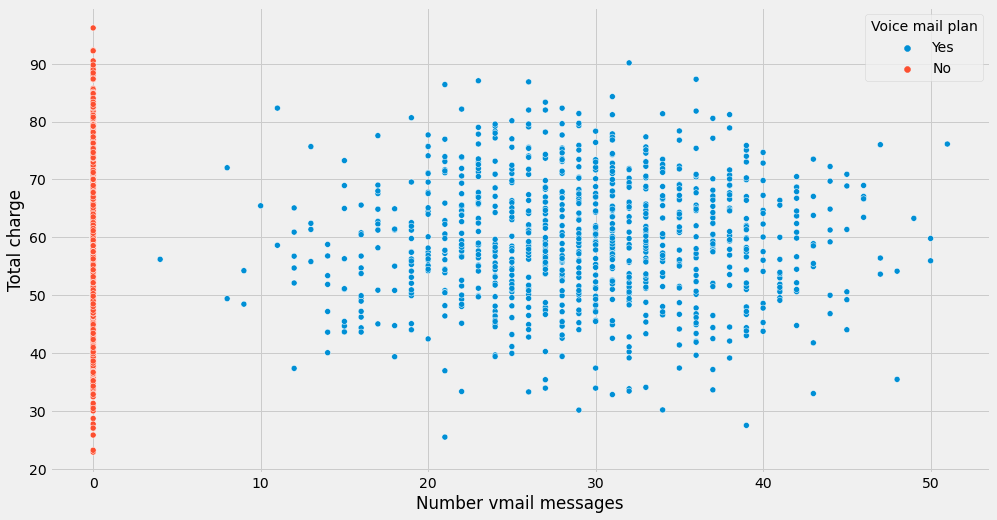

In [ ]:
sns.scatterplot(y = 'Total charge', x = 'Number vmail messages', hue = 'Voice mail plan', data = df)

Observation: Not an exceptional correlation

2. Correlation with total day charge, evening charge, night charge, and international charge

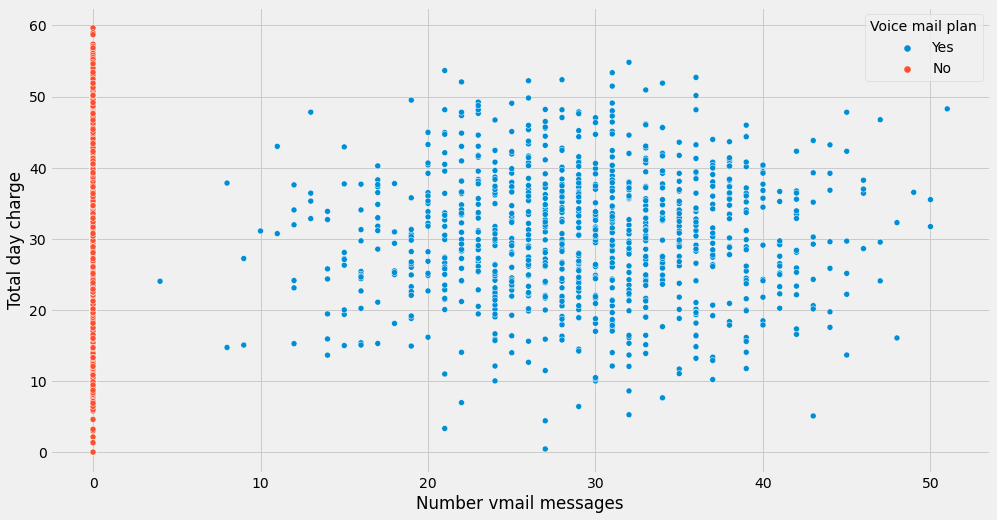

In [ ]:
sns.scatterplot(y = 'Total day charge', x = 'Number vmail messages', hue = 'Voice mail plan', data = df)

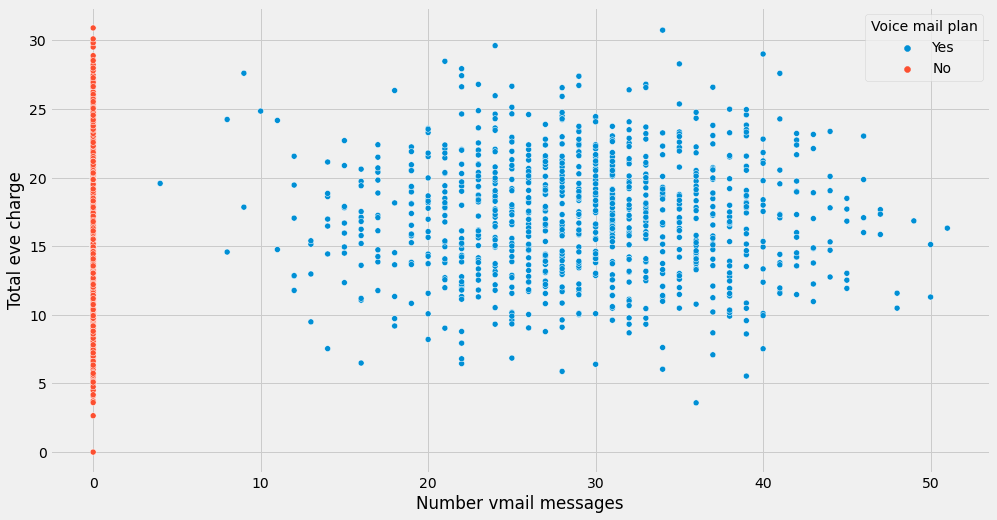

In [ ]:
sns.scatterplot(y = 'Total eve charge', x = 'Number vmail messages', hue = 'Voice mail plan', data = df)

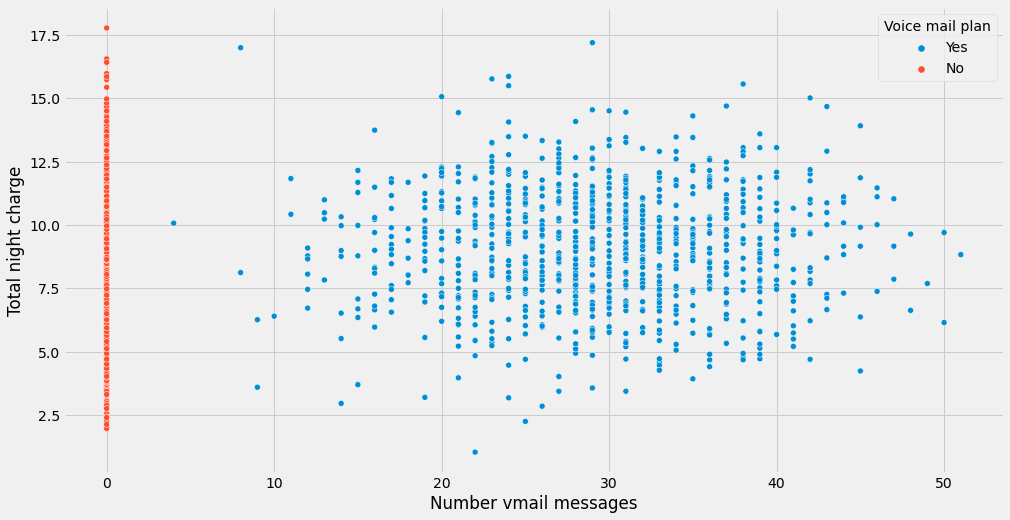

In [ ]:
sns.scatterplot(y = 'Total night charge', x = 'Number vmail messages', hue = 'Voice mail plan', data = df)

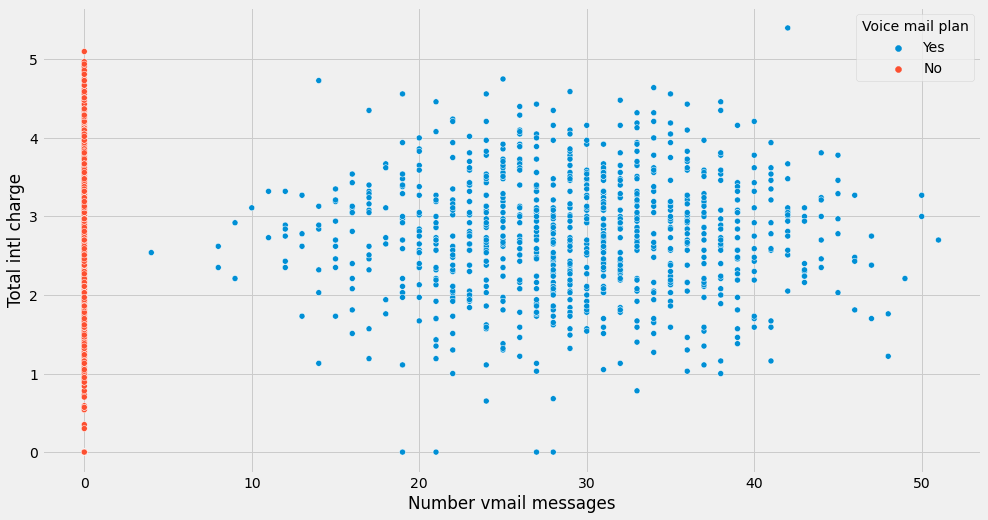

In [ ]:
sns.scatterplot(y = 'Total intl charge', x = 'Number vmail messages', hue = 'Voice mail plan', data = df)

Observation: Nothing stands out particularly from the scatterplots above that deserves special attention

3. Correlation with the total no. of calls

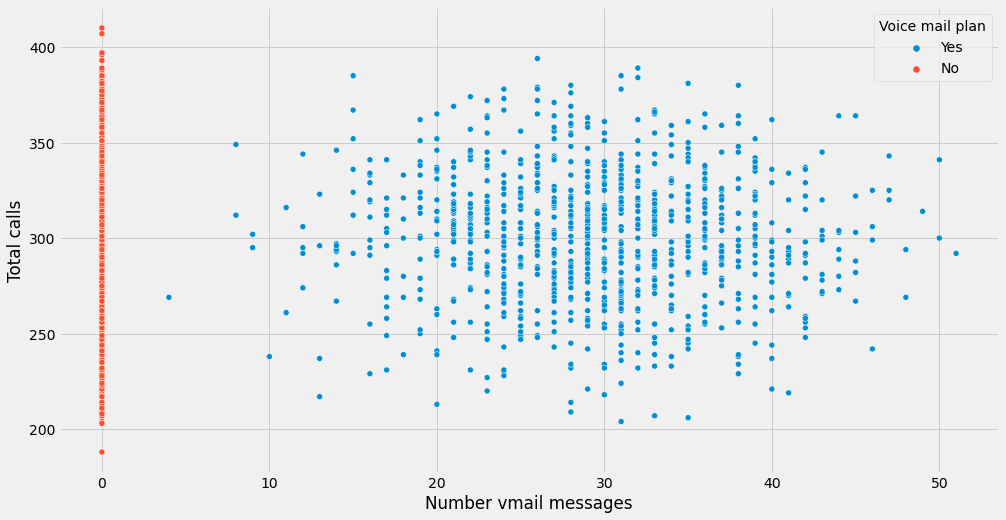

In [ ]:
sns.scatterplot(x = 'Number vmail messages', y = 'Total calls', hue = 'Voice mail plan', data = df)

Observation: A slight downward trend could be observed on the y axis as we go right along the abscissa. This might be because customers use more voice calls only when their calls are either not picked up or are not getting connected. Or perhaps when they want to send messages of little importance.

4. Correlation between total calls and total minutes hued by the no. of voice mails

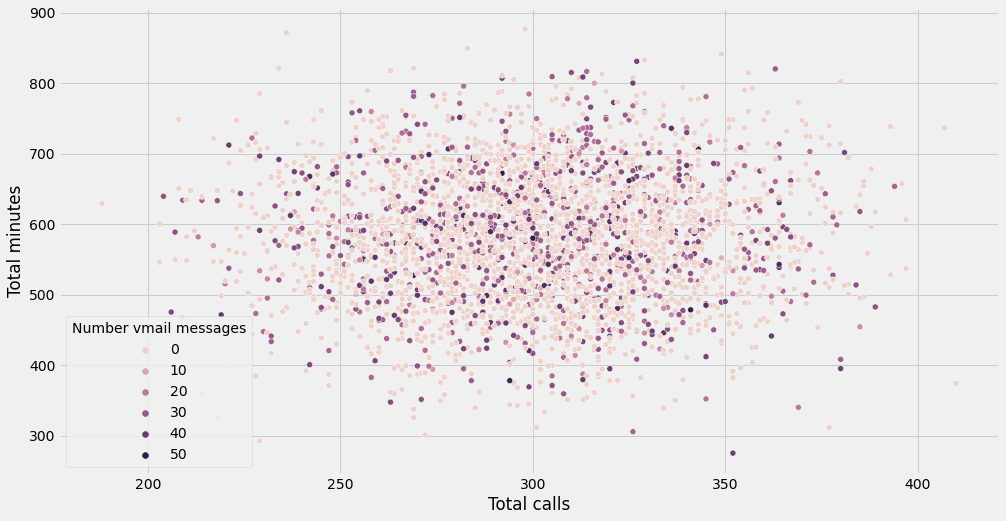

In [ ]:
sns.scatterplot(y = 'Total minutes', x = 'Total calls', hue = 'Number vmail messages', data = df)

Observation: Nothing that really has to be brought to the fore.

*When are people calling more?*

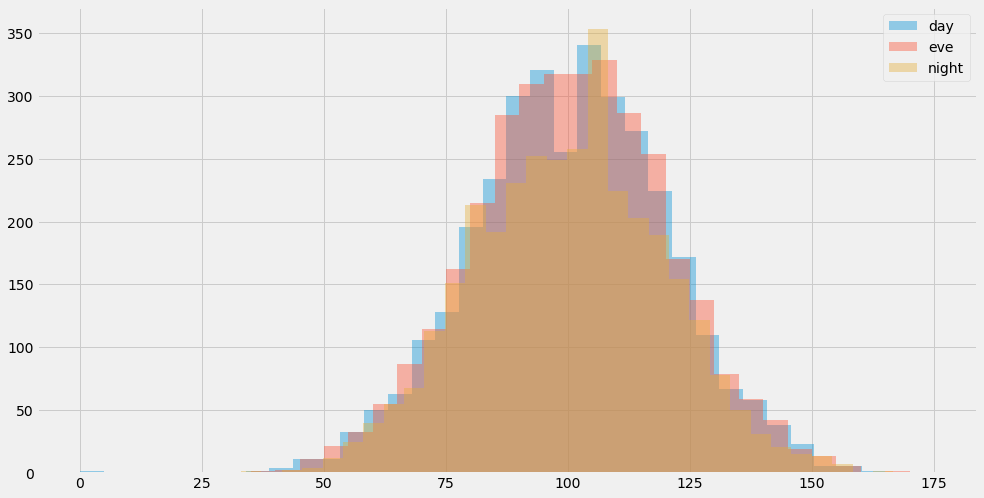

In [ ]:
df['Total day calls'].hist(bins = 34, label = 'day', alpha = 0.4)
df['Total eve calls'].hist(bins = 34, label = 'eve', alpha = 0.4)
df['Total night calls'].hist(bins = 34, label = 'night', alpha = 0.4)

plt.legend()

# ***Conclusion***

From the above EDA, I conclude that my earlier hypothesis - Customers that are being charged more, tend to churn more - stands unvalidated for the population. It is true that a huge difference was noted in this sample, when a comparative study demonstrated that after a threshold charge of 70 units, the probability for the customers churning surpasses the probability of its counterparts. But, that effect might have transpired by chance. Perhaps we need more data to confirm the hypothesis, but for now there is no reason to believe in that.

I want to give a few suggestions to the company based on my analysis. 

1. It seems to me that there's no perks for the customers that are availing for international plans, nor is there a difference between the international charges scheme for the customers opting and not opting for the plan.

2. The charges for the voice calls seems abysmally small. Perhaps the company might lower the international charges in order to adjust the charges in their voice call scheme.

3. The company should consider increasing the evening charges and lower the day charges as the customers seem to be calling more during the evening. 